Árbol de decisión de regresión
Se puede usar un árbol de decisión para la regresión y también para la clasificación.
Para tareas de regresión, los árboles de decisión se entrenan de manera similar a la clasificación pero no predicen una clase, sino un número.

Por ejemplo, Gabriel llegó por fin a Hawái. ¿Cuánto le costará un boleto para el Museo de Arte de Caricaturas?

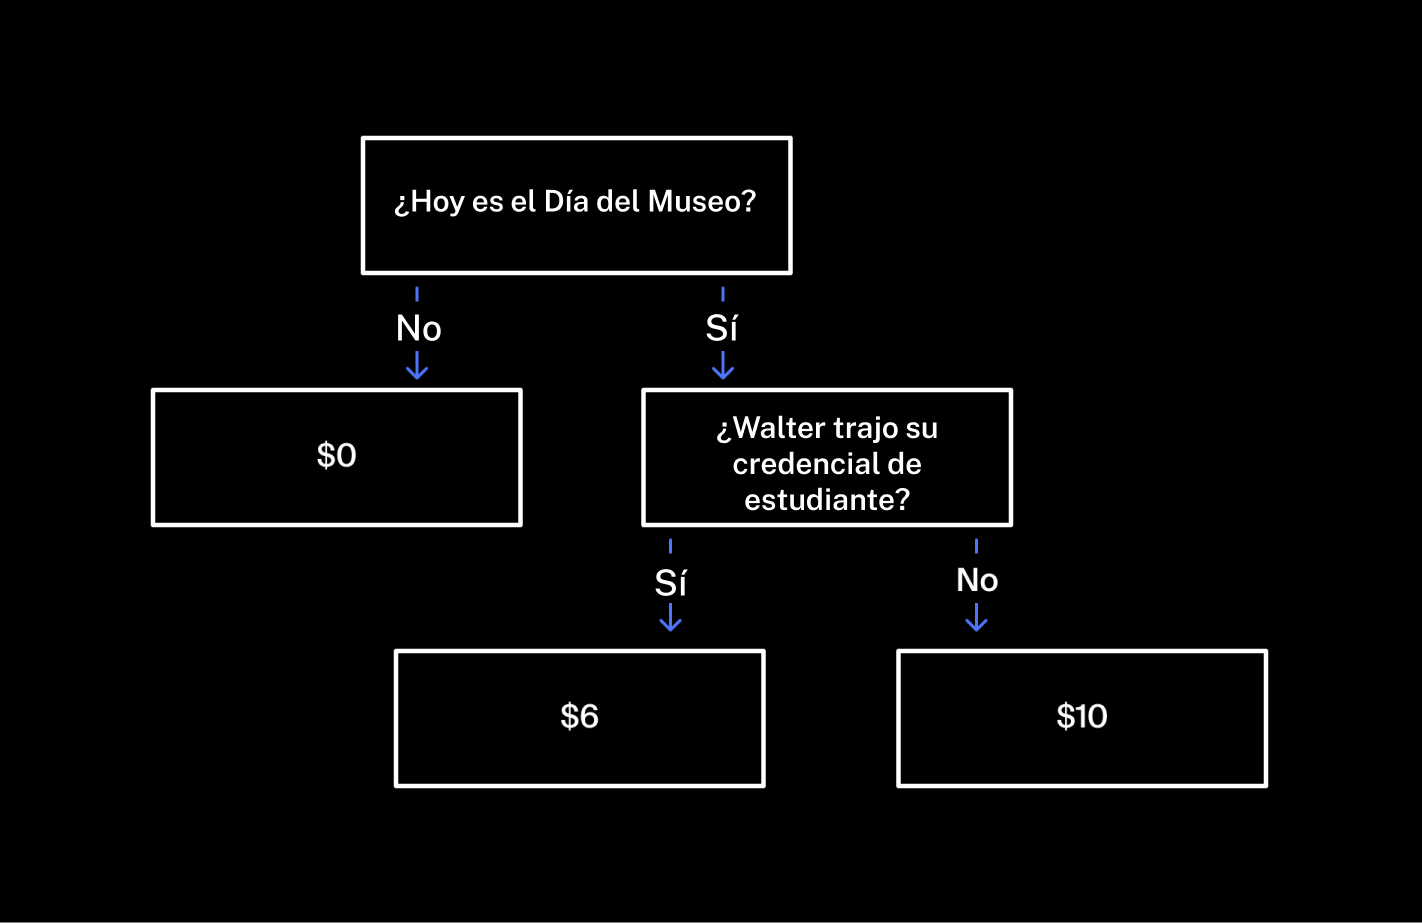



Destina 25% de los datos al conjunto de validación y el resto para el de entrenamiento.
Entrena modelos de árbol de decisión para un problema de regresión con diferentes valores de profundidad entre 1 y 6.
Calcula el valor de RECM en el conjunto de validación para cada modelo.
Almacena en la variable best_model el modelo con el mejor valor de RECM en el conjunto de validación. Para calcular la métrica RECM, toma el valor de la raíz cuadrada del ECM:
¿Es un buen resultado? Comparémoslo con otros modelos. Por lo menos podemos tener la certeza de que nuestro modelo pasó la prueba de cordura.

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('datasets/moved_train_data_us.csv')

# Preparar características y objetivo
features = df.drop(['last_price'], axis=1)
target = df['last_price'] / 1000000 # Escalar el objetivo para números más pequeños

# Dividir los datos en entrenamiento y validación
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345) # segmenta el 25% de los datos para hacer el conjunto de validación

# Variables para almacenar el mejor modelo y resultados
best_model = None
best_result = 10000
best_depth = 0


for depth in range(1, 6):  # Probar profundidades entre 1 y 6
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)  # Modelo con profundidad específica
    model.fit(features_train, target_train)  # Entrenar el modelo
    predictions_valid = model.predict(features_valid)  # Obtener predicciones en el conjunto de validación
    result = mean_squared_error(target_valid, predictions_valid) ** 0.5  # Calcular RECM
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth

print(f"RECM del mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_result}")

RECM del mejor modelo en el conjunto de validación (max_depth = 5): 0.1308258643787925
